In [2]:
#package imports and graph style
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import yfinance as yf
import datetime

plt.style.use('seaborn-whitegrid')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#function to calculate and store results for 1 stock at a time. Output is a Dataframe
def calculateLongTermReturn(stock, startDate, endDate):
    
    #pull data for yfinance (stock = text, Date format = "yyyy-mm-dd")
    ticker_df = yf.download(stock, start = startDate, end = endDate)
    
    #add in day of the week column
    ticker_df["day of the week"] = ticker_df.index.strftime("%A")
    
    #create empty Data Frame to store results
    temp = stock + "DataFrame"
    temp = pd.DataFrame(columns = ["Current Total Value", "Current Average Price", 
                                       "Number of Shares Purchased", "Current Profit Loss", 
                                       "Current Percent Profit Loss"])

    #current total value of all stock purchases
    currentTotalValue = 0

    #current total holdings average price
    currentAvgPrice = 0

    #number of shares bought 
    numSharesPurchased = 0

    #current profit/loss  value
    currentProfitLoss = 0

    #current percent gain on account value
    currentPercentPL = 0


    #iterating over rows of the dataframe
    for index, row in ticker_df.iterrows():
        #print(index, row["day of the week"])
        if(row["day of the week"] == "Tuesday"):
            currentTotalValue += row["Open"]
            numSharesPurchased += 1
            currentAvgPrice = currentTotalValue/numSharesPurchased
            currentProfitLoss = (row["Close"] - currentAvgPrice)*numSharesPurchased
            currentPercentPL = currentProfitLoss/currentTotalValue
            #current percent PL is in decimal form, not percent form for graphing purposes

            #adding running values to dataframe
            newRow = pd.Series(data = {"Current Total Value": currentTotalValue, "Current Average Price": currentAvgPrice, 
                                       "Number of Shares Purchased": numSharesPurchased, "Current Profit Loss": currentProfitLoss, 
                                       "Current Percent Profit Loss": currentPercentPL}, name = index)

            temp = temp.append(newRow, ignore_index = False)

    return temp


#results = calculateLongTermReturn("SPY", "2010-01-01", "2020-07-31")


In [5]:
#creating a dictionary of dataframes that can be accessed by the stock ticker name
#run for multiple stocks. Produces multiple dataframes

allStocks = {}

#if you want to run the code for different stocks, then edit the list of stocks below and the Start and End dates
stocks = ["SPY", "VTI", "AAPL", "MSFT", "AMZN", "WMT", "KO", "MCD"]

officialStartDate = "2010-01-01"
officialEndDate = "2020-08-31"

for i in stocks:
    allStocks.update({i: calculateLongTermReturn(i, officialStartDate, officialEndDate)})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


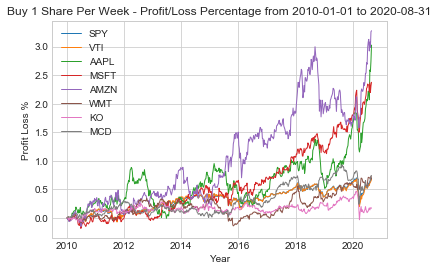

In [7]:
#plotting Profit/Loss Percent % column of all stocks

x = allStocks["SPY"].index
plt.xlabel("Year")
plt.ylabel("Profit Loss %")
plt.title("Buy 1 Share Per Week - Profit/Loss Percentage from " + officialStartDate + " to " + officialEndDate)


for i in stocks:
    y = allStocks[i]["Current Percent Profit Loss"]
    plt.plot(x, y, label = i, linewidth = 1.0)
    #writes each stock Percent Profit Loss to an Excel
    allStocks[i]["Current Percent Profit Loss"].to_excel(i+"EXCEL.xlsx")

plt.legend()
plt.savefig("graphResults1.png", dpi = 300)